In [4]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../Josh/EnergyAndAvgWeather.csv")
df = pd.DataFrame(df, columns=["temp", "total load actual"])
df = df.dropna()
df.head()

,temp,total load actual
0,272.491463,25385.0
1,272.512700,24382.0
2,272.099137,22734.0
3,272.089469,21286.0
4,272.145900,20264.0


In [6]:
total_load = pd.DataFrame(df, columns=["total load actual"])
temp = pd.DataFrame(df, columns=["temp"])
total_load.shape

(32257, 1)

In [7]:
temp.shape

(32257, 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
normalizer = MinMaxScaler()
temp = normalizer.fit_transform(temp)
total_load = normalizer.fit_transform(total_load)

In [78]:
from sklearn.model_selection import train_test_split

# Split the data by a 80:20 ratio
temp_train, temp_test, total_load_train, total_load_test = train_test_split(
    temp, total_load, test_size=0.2, random_state=5
)

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def create_nn_model(n=0):
    model = Sequential()
    layers = [
        Dense(n+1, input_dim=n+1, kernel_initializer="normal", activation="relu"),
        Dense(10, activation="relu"),
        Dense(1),
    ]

    for layer in layers:
        model.add(layer)

    model.compile(optimizer="adam", loss="mse", metrics=["mse"])
    return model

In [80]:
model = create_nn_model()
hist = model.fit(temp_train, total_load_train, validation_split=0.2, epochs=100, verbose=0)

In [81]:
from sklearn.metrics import r2_score

total_load_train_pred = model.predict(temp_train)
model.evaluate(temp_train, total_load_train)

807/807 [==============================] - 2s 2ms/step - loss: 0.0162 - mse: 0.0162


[0.016191266477108, 0.016191266477108]

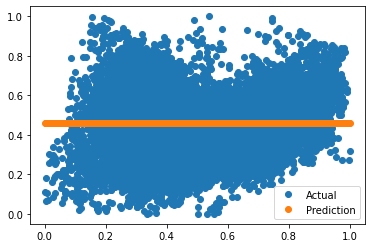

In [82]:
plt.plot(temp_train, total_load_train, marker="o", linestyle="", label="Actual")
plt.plot(temp_train, total_load_train_pred, marker="o", linestyle="", label="Prediction")
plt.legend()

## Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=100)
forest_regressor.fit(temp_train, total_load_train.ravel())

RandomForestRegressor()

In [84]:
total_load_train_pred = forest_regressor.predict(temp_train)

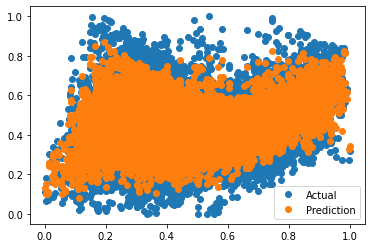

In [85]:
plt.plot(temp_train, total_load_train, marker="o", linestyle="", label="Actual")
plt.plot(temp_train, total_load_train_pred, marker="o", linestyle="", label="Prediction")
plt.legend()

In [86]:
from sklearn.metrics import mean_squared_error

print("Training RMSE: %.3f" % mean_squared_error(total_load_train, total_load_train_pred, squared=False))

Training RMSE: 0.072


In [87]:
total_load_test_pred = forest_regressor.predict(temp_test)

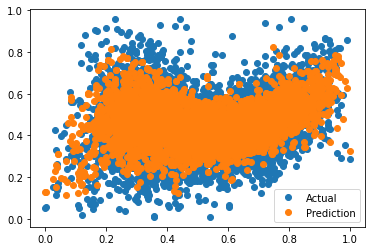

In [88]:
plt.plot(temp_test, total_load_test, marker="o", linestyle="", label="Actual")
plt.plot(temp_test, total_load_test_pred, marker="o", linestyle="", label="Prediction")
plt.legend()

In [93]:
print("Testing RMSE: %.3f" % mean_squared_error(total_load_test, total_load_test_pred, squared=False))

Testing RMSE: 0.142
